<a href="https://colab.research.google.com/github/TedFess/DSPS_tFessaras/blob/master/HW6/SNdataLineFit_tFessaras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

# Get the data

Download the supernova (SN) data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it (untar unzip) within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

drive/  sample_data/


In [0]:
mkdir 'drive/My Drive/dsps/data'

In [4]:
cd 'drive/My Drive/dsps/data'

/content/drive/My Drive/dsps/data


In [5]:
!wget 'http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz'

--2019-10-17 23:23:10--  http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
Resolving supernovae.in2p3.fr (supernovae.in2p3.fr)... 134.158.152.153
Connecting to supernovae.in2p3.fr (supernovae.in2p3.fr)|134.158.152.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23716633 (23M) [application/x-gzip]
Saving to: ‘jla_likelihood_v6.tgz’

jla_likelihood_v6.t 100%[===================>]  22.62M  3.21MB/s    in 17s     

2019-10-17 23:23:28 (1.34 MB/s) - ‘jla_likelihood_v6.tgz’ saved [23716633/23716633]



In [6]:
!tar zxvf jla_likelihood_v6.tgz

jla_likelihood_v6/src/ini.o
jla_likelihood_v6/src/ini.h
jla_likelihood_v6/src/jla.cc
jla_likelihood_v6/src/ini.c
jla_likelihood_v6/src/jla.o
jla_likelihood_v6/src/test.cc
jla_likelihood_v6/src/jla.h
jla_likelihood_v6/src/test.o
jla_likelihood_v6/makefile
jla_likelihood_v6/data/jla_v0b_covmatrix.dat
jla_likelihood_v6/data/jla_mub_covmatrix.dat
jla_likelihood_v6/data/jla_v0_covmatrix.dat
jla_likelihood_v6/data/jla_mub.txt~
jla_likelihood_v6/data/jla_vab_covmatrix.dat
jla_likelihood_v6/data/JLA.paramnames
jla_likelihood_v6/data/jla.dataset
jla_likelihood_v6/data/jla_va_covmatrix.dat
jla_likelihood_v6/data/jla_mub.txt
jla_likelihood_v6/data/jla_lcparams.txt
jla_likelihood_v6/data/jla_simple.dataset~
jla_likelihood_v6/data/jla_vb_covmatrix.dat
jla_likelihood_v6/data/jla_v0a_covmatrix.dat
jla_likelihood_v6/data/jla_simple.dataset
jla_likelihood_v6/ReadMe.txt
jla_likelihood_v6/LICENSE.txt


In [7]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [0]:
jla = pd.read_csv("dsps/data/jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [9]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [10]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [11]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

Use pandas scatter matrix to see the relationship between variables (Lab6). If you look in HW5 you can see how to rotate the labels

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


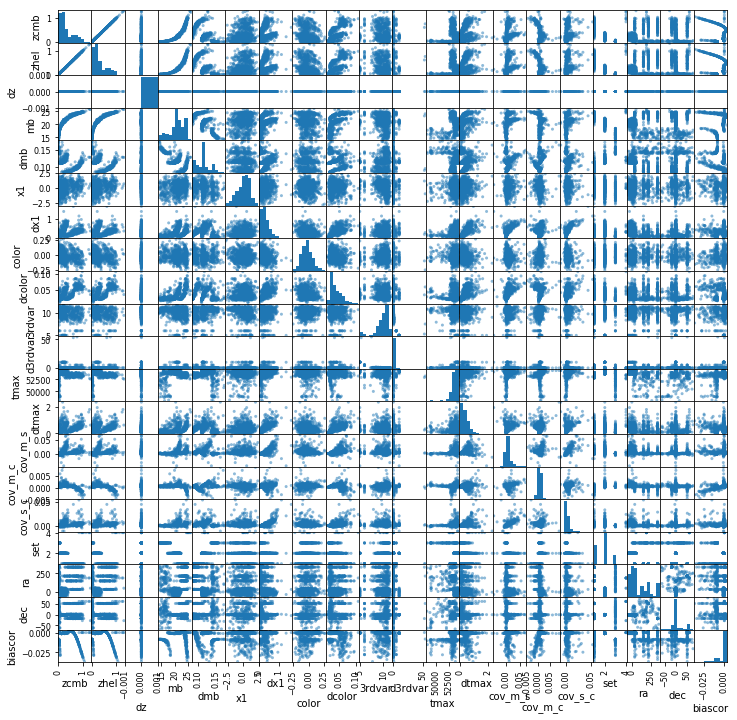

In [12]:
ax = plt.figure(figsize = (12,12)).add_subplot(1,1,1)
pd.plotting.scatter_matrix(jla, ax = ax)
ax.set_title('Relationships between the Variables in the Dataset');

**Figure 1**: Figure of scatter matrix of data read in to look at relationship between variables.

The target variables for our analysis are redshift and brightness: "zcmb" and "mb". This an exercise about fitting lines to data. Why does it lot look like there is a line relationship between them? How can does the relationship look? Plot the "zcmb" vs "mb". Include the y uncertainty which is reported in "dmb". Plot each data point with a different color based on the survey it comes from. The survey data is indicated by the variable "set". To do it you can use the dataframe plotting methods (```df.plot.scatter()```),  or pylab:  ```pylab.scatter()```, or ```pylab.plot()``` --asking to plot the data as point ('.')-- but for each the way you relate the color to a column value is a bit different. Stackoverflow is your friend here!

In [0]:
#make variables
zcmb = jla["zcmb"].copy()
mb = jla["mb"].copy()
uncertainty = jla["dmb"].copy()

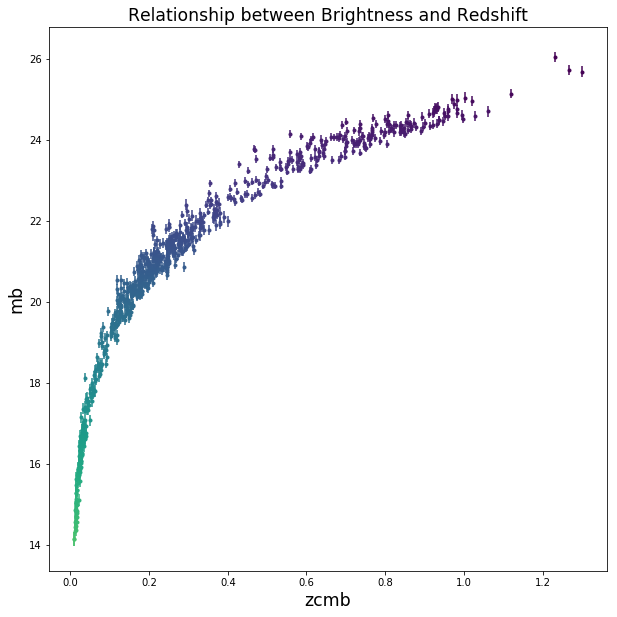

In [14]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(zcmb,mb, s = 0, c = zcmb);
norm = matplotlib.colors.Normalize(vmin=min(mb), vmax=max(mb), clip=True);
mapper = cm.ScalarMappable(norm=norm, cmap='viridis');
m = max(mb)
n = min(mb)
time_color = np.array([(mapper.to_rgba(m + n - 0.75*v - 7)) for v in mb]);

for x, y, e, color in zip(zcmb, mb, uncertainty, time_color):
  ax.plot(x, y, '.', color=color)
  ax.errorbar(x, y, e, color=color)
ax.set_title("Relationship between Brightness and Redshift", fontsize = "xx-large")
ax.set_xlabel("zcmb", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Figure 2**: Above is a figure of a scatterplot with error bars. This is to show relationship between brightness and redshift. The plot does not look linear by any means, however it seems to take on a logarithmic increase.

It is a **power law**, which means it will be linear in logarithmic space - specifically in log10(_x_) vs natural _y_ space.

Replot the data with natural y axis and logarithmic x axis, you can do that by taking the log of the data and then plotting it or by using plot functionalities (e.g. for ```df.plot.scatter()``` you can use ```logx=True```)

Note that when we talk about log we (generally) talk about log base 10! 


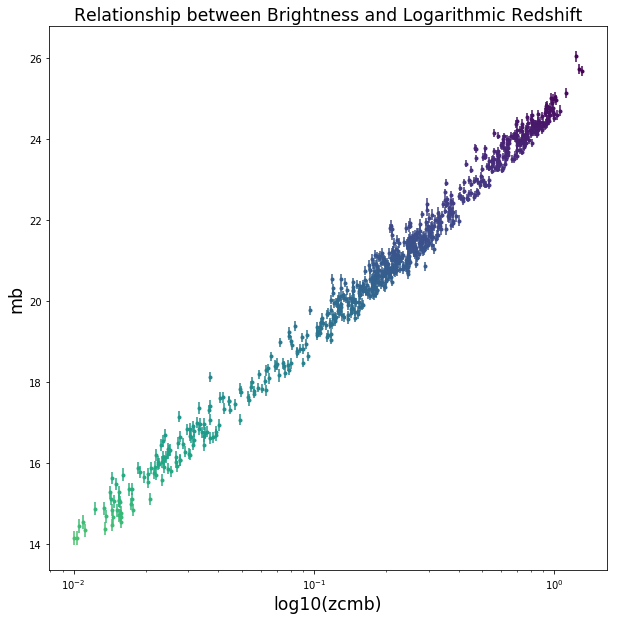

In [15]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

for x, y, e, color in zip(zcmb, mb, uncertainty, time_color):
  ax.plot(x, y, '.', color=color)
  ax.errorbar(x, y, e, color=color)
ax.set_title("Relationship between Brightness and Logarithmic Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Figure 3**: Using a logarithmic scale now for the x-axis. The same scatterplot shown above now appears to be linearly increasing. As the redshift increases logarithmically, the brightness increases linearly.

# Fit a line to the data with scipy

For each model you fit below you should make a plot of the data and the model. Consider your fit to the data with the uncertainties your "baseline fit"

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it without and with the uncertainties on your _y_ data (the ```curvefit``` argument to include uncertainties in the endogenous variable is ```sigma```). Report the variace and the covariance by printing your mode uncertainties explicitly as below:





In [0]:
def line(x, a, b):
  """
  Takes two parameters (a and b) along with an array of x values. 
  Returns y array.
  """
  y = a * x + b
  return y

In [0]:
import statsmodels.api as sm
from statsmodels import graphics
from statsmodels.formula import api as smf
from scipy import optimize
from scipy.optimize import curve_fit

In [18]:
logzcmb = np.log10(zcmb)

#Fitting data WITHOUT the uncertainties in the y
params1, cov1 = curve_fit(line, logzcmb, mb)
a1, b1 = params1
#print(params)
#print(cov)
da1, db1 = np.sqrt(cov1[0][0]), np.sqrt(cov1[1][1])

print("slope = %.1f \u00B1 %.3f" % (a1, da1))
print("intercept = %.0f \u00B1 %.3f" % (b1, db1))
print("parameters covariance = %.5f " % cov1[0][1])

slope = 5.4 ± 0.022
intercept = 25 ± 0.019
parameters covariance = 0.00035 


In [19]:
#Fitting data WITH the uncertainties in the y
sig = np.zeros(len(mb)) + np.std(uncertainty)
params2, cov2 = curve_fit(line, logzcmb, mb, sigma = uncertainty, absolute_sigma = True)
a2, b2 = params2
da2, db2 = np.sqrt(cov2[0][0]), np.sqrt(cov2[1][1])

print("slope = %.1f \u00B1 %.3f" % (a2, da2))
print("intercept = %.0f \u00B1 %.3f" % (b2, db2))
print("parameters covariance = %.5f " % cov2[0][1])

slope = 5.4 ± 0.009
intercept = 25 ± 0.007
parameters covariance = 0.00005 


hint: remember to sort the data!

plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

Compare the model values and uncertainty you obtained by fitting the model with and without including the uncertainties on the y values. Comment on your findings.

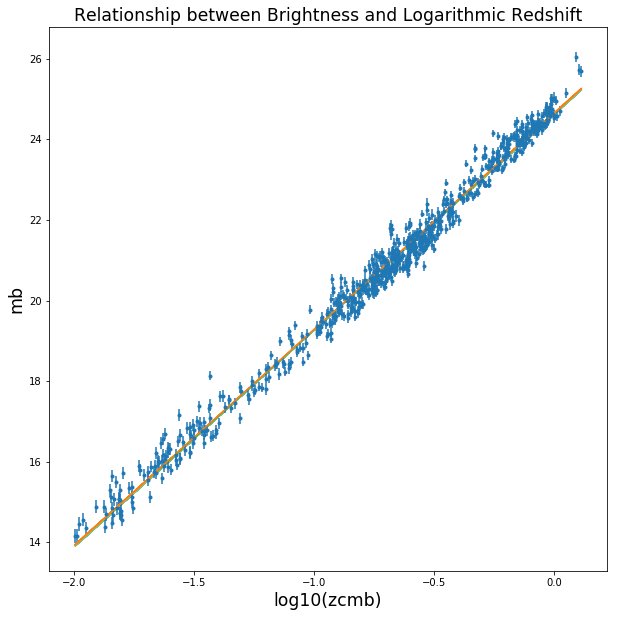

In [20]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.scatter(logzcmb, mb, s = 1)
ax.errorbar(logzcmb, mb, xerr=None, yerr=uncertainty, fmt='.')

modelMb1 = line(logzcmb, a1, b1)
maxMb1 = line(logzcmb, a1 + np.sqrt(cov1[0][0]), b1 + np.sqrt(cov1[1][1]))
minMb1 = line(logzcmb, a1 - np.sqrt(cov1[0][0]), b1 - np.sqrt(cov1[1][1]))

ax.plot(logzcmb, modelMb1)
ax.fill_between(logzcmb, maxMb1, minMb1, color = 'green', alpha = 0.5)

ax.set_title("Relationship between Brightness and Logarithmic Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Figure 4**: Above is the scatterplot of the logscale of redshift with the brightness. However, a linear line is fitted as an orange line on the graph. The green line beside it is the uncertainty band.

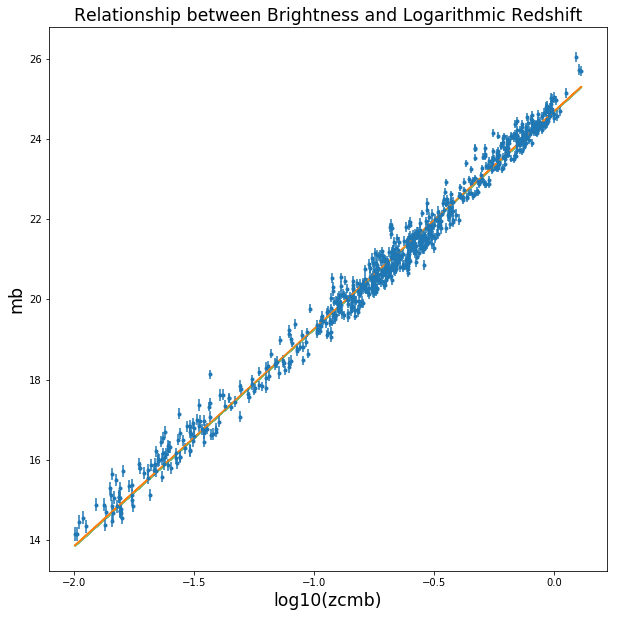

In [21]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.scatter(logzcmb, mb, s = 1)
ax.errorbar(logzcmb, mb, xerr=None, yerr=uncertainty, fmt='.')

modelMb2 = line(logzcmb, a2, b2)
maxMb2 = line(logzcmb, a2 + np.sqrt(cov2[0][0]), b2 + np.sqrt(cov2[1][1]))
minMb2 = line(logzcmb, a2 - np.sqrt(cov2[0][0]), b2 - np.sqrt(cov2[1][1]))

ax.plot(logzcmb, modelMb2)
ax.fill_between(logzcmb, maxMb2, minMb2, color = 'green', alpha = 0.5)

ax.set_title("Relationship between Brightness and Logarithmic Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Figure 5**: Above is the same scatterplot as the one above it, however this time the fitted line takes into account the uncertainties. The green line next to it is the same uncertainty band as before.

**Observation**: Comparing the two models above, we can see that the sahpes are very similar with and without taking the uncertainties into account. However, the slope and intercept uncertanties are large in the model without those being taken into account than in the line with the uncertainties taken into account. additionally, the covariance is also higher in the line fitted without the uncertainties.

Now fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Plot the new model and its uncertainty band and comment on the model: how do the three models compare?

# Fit a quadratic equation

Use the same function ```curve_fit()``` to fit a quadratic equation to the data. 
The equation is below

Plot your data, your original model which included uncertainties, and the current quadratic model


In [0]:
def quad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * x**2 + b * x + c


In [24]:
params4, cov4 = curve_fit(quad, logzcmb, mb, sigma = uncertainty, absolute_sigma = True)
a4, b4, c4 = params4
da4, db4, dc4 = np.sqrt(cov4[0][0]), np.sqrt(cov4[1][1]), np.sqrt(cov4[2][2])

print("x2 term = %.1f \u00B1 %.3f" % (a4, da4))
print("x1 term = %.1f \u00B1 %.3f" % (b4, db4))
print("x0 term = %.0f \u00B1 %.3f" % (c4, dc4))
print("parameters covariance = %.5f " % cov4[0][1])

x2 term = 0.3 ± 0.017
x1 term = 6.0 ± 0.028
x0 term = 25 ± 0.010
parameters covariance = 0.00044 


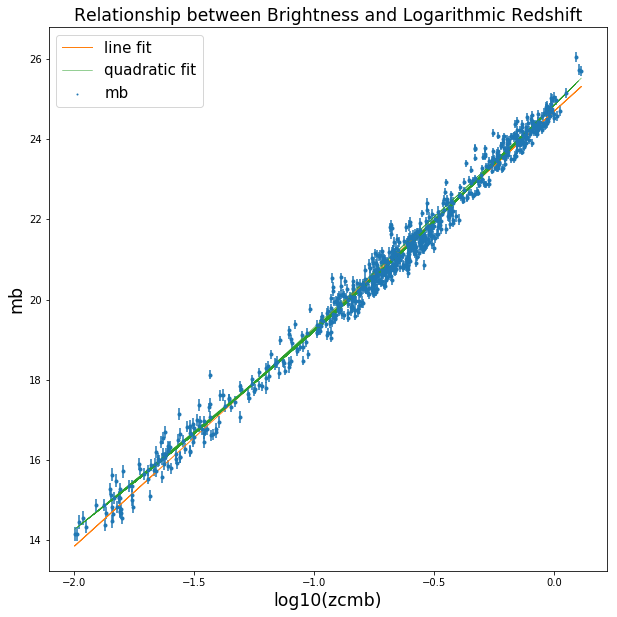

In [25]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.scatter(logzcmb, mb, s = 1)
ax.errorbar(logzcmb, mb, xerr=None, yerr=uncertainty, fmt='.')

modelMb4 = quad(logzcmb, a4, b4, c4)

ax.plot(logzcmb, modelMb2, label="line fit", linewidth = 1)
ax.plot(logzcmb, modelMb4, label="quadratic fit", linewidth = 0.5)

ax.set_title("Relationship between Brightness and Logarithmic Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large")
ax.legend(['line fit', 'quadratic fit', 'mb'], loc = 'upper left', fontsize = 15)

**Figure 6**: Above is a similar plot to the others as before, except there is an additional green line to represent a quadtratic model whereas the orange line still represents a linear model.

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the input data. Make the usual plot of data and model including your baseline model with scipy

In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


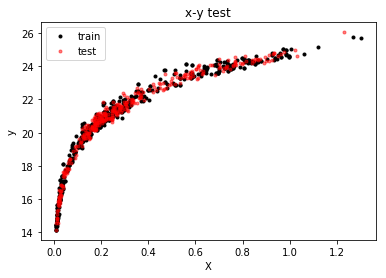

In [41]:
# handmade train-test split
Nall = len(jla)
Ntrain = int(Nall * 0.75)
train = numpy.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)
X_train, y_train = jla.zcmb[train], jla.mb[train]
X_test, y_test = jla.zcmb[test], jla.mb[test]
plt.plot(X_train, y_train, 'k.', label="train")
plt.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
plt.xlabel("X")
plt.ylabel("y")
plt.title("x-y test")
plt.legend()

**Figure 7**: Plot to test data

Plot the data, the baseline mode, and the new model, but colorcode the data based on the training or test set (instead othe survey it comes from like you had done before)

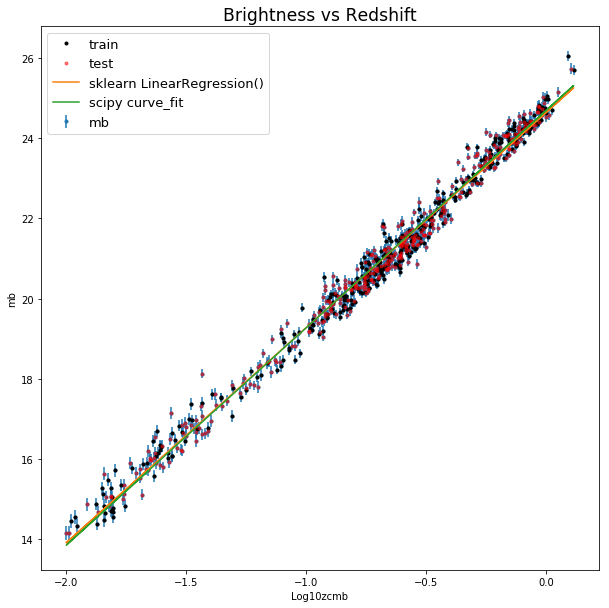

In [42]:


# split the log10(zcmb) data
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(logzcmb, mb, test_size = 0.5, random_state = 467)

# Make models based on only the training data
params5, cov5 = curve_fit(line, X_train, y_train)
a5, b5 = params5
modelMb5 = line(X_train, a5, b5)

regr = skl.linear_model.LinearRegression()
regr.fit(np.atleast_2d(X_train).T, y_train)
modelMb6 = regr.predict(np.atleast_2d(logzcmb).T)

# Plot the data and the models
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(logzcmb, mb, xerr=None, yerr=uncertainty, fmt='.', zorder = 0)

ax.plot(X_train, y_train, 'k.', label="train")
ax.plot(X_test, y_test, 'r.', alpha=0.5, label="test")

ax.plot(logzcmb, modelMb6, '-', label = "sklearn LinearRegression()", color = 'C1')
ax.plot(logzcmb, modelMb2, '-', label = "scipy curve_fit", color = "C2")
#ax.errorbar(logzcmb, mb, xerr=None, yerr=uncertainty, fmt='.')

ax.set_title("Brightness vs Redshift", fontsize = "xx-large")
ax.set_xlabel("Log10zcmb")
ax.set_ylabel("mb")
ax.legend(fontsize = 13)



**Figure 8**: Same plot as the last performed fit, however this time the data is split using sklearn. The log10zcmb redshift is plotted against the brightness. The lines fitted include by the scipy curve_fit method in addition with the linearregression from sklearn.

Calculate the scores of the train and test set. Make considerations about the quality of the model including how robust it is (is it overfitting?)

In [34]:
# R-squared values for the training data
scipyR2 = r2_score(y_train, modelMb5)
sklearnR2 = np.round(regr.score(np.atleast_2d(X_train).T, y_train), 3)
print('\033[4mFor the training data\033[0m\nScipy model: R\u00b2 = %.3f \nSklearn model: R\u00b2 = %.3f' % (scipyR2, sklearnR2))

# R-squared values for the test data
scipyR2 = r2_score(y_test, line(X_test, a5, b5))
sklearnR2 = np.round(regr.score(np.atleast_2d(X_test).T, y_test), 3)
print('\n\033[4mFor the test data\033[0m\nScipy model: R\u00b2 = %.3f \nSklearn model: R\u00b2 = %.3f ' % (scipyR2, sklearnR2))

For the training data
Scipy model: R² = 0.988 
Sklearn model: R² = 0.988

For the test data
Scipy model: R² = 0.987 
Sklearn model: R² = 0.987 
